<a href="https://colab.research.google.com/github/taniasuchi07/Technical-Assessment/blob/main/Hospital_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hospital_operations_2020_2023.csv")
df

,hospital_id,hospital_name,state,hospital_type,year,operational_costs,total_revenue,profit_margin,discharges,cost_per_patient,efficiency_ratio,avg_length_of_stay,readmission_rate,ai_integration_index,staff_productivity,patient_satisfaction
0,1001,Hospital_1001,FL,Rural,2020,2.014494e+08,2.379409e+08,15.34,31132,6470.81,1.181,7.22,8.33,0.212,74.73,72.71
1,1002,Hospital_1002,NY,Urban Teaching,2020,3.635317e+08,4.274364e+08,14.95,8412,43215.85,1.176,3.20,13.85,0.308,86.94,74.78
2,1003,Hospital_1003,OH,Rural,2020,3.058341e+08,3.563533e+08,14.18,25506,11990.67,1.165,5.06,13.21,0.200,107.23,73.79
3,1004,Hospital_1004,NY,Rural,2020,4.362857e+08,4.955328e+08,11.96,13644,31976.38,1.136,6.70,11.34,0.395,89.86,64.53
4,1005,Hospital_1005,NC,Urban Teaching,2020,2.253281e+08,2.500077e+08,9.87,47954,4698.84,1.110,4.95,8.15,0.349,108.02,73.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1246,Hospital_1246,MI,Rural,2023,4.035500e+08,4.780870e+08,15.59,31383,12858.87,1.185,6.18,18.23,0.480,103.73,82.36
996,1247,Hospital_1247,TX,Rural,2023,1.416992e+08,1.698378e+08,16.57,52716,2687.97,1.199,7.51,11.79,0.539,90.81,73.62
997,1248,Hospital_1248,FL,Rural,2023,1.827190e+08,1.924128e+08,5.04,33568,5443.25,1.053,3.11,8.78,0.741,90.90,95.53
998,1249,Hospital_1249,TX,Urban Non-teaching,2023,4.018787e+08,4.344829e+08,7.50,24924,16124.16,1.081,3.02,11.47,0.740,73.66,93.50


In [ ]:
df.dtypes

,0
hospital_id,int64
hospital_name,object
state,object
hospital_type,object
year,int64
operational_costs,float64
total_revenue,float64
profit_margin,float64
discharges,int64
cost_per_patient,float64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

=== Descriptive Statistics ===


,mean,std,min,median,max
operational_costs,2.715734e+08,1.298405e+08,50013823.48,2.652474e+08,4.997362e+08
total_revenue,3.111856e+08,1.490771e+08,53886922.44,2.999552e+08,6.135214e+08
cost_per_patient,1.059752e+04,8.709100e+03,884.87,8.139365e+03,5.446652e+04
avg_length_of_stay,5.440870e+00,1.432707e+00,3.01,5.485000e+00,8.000000e+00
readmission_rate,1.483922e+01,4.127466e+00,8.01,1.475000e+01,2.200000e+01
ai_integration_index,4.521160e-01,1.851891e-01,0.00,4.575000e-01,1.000000e+00
staff_productivity,8.974840e+01,1.158770e+01,70.00,9.001500e+01,1.099800e+02



=== Regression Summary (Excerpt) ===
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               10.1329      0.390     26.001      0.000       9.369      10.897
ai_integration_index                 0.1016      0.106      0.960      0.337      -0.106       0.309
discharges                       -3.293e-05   1.34e-06    -24.588      0.000   -3.56e-05   -3.03e-05
avg_length_of_stay                   0.0164      0.014      1.207      0.228      -0.010       0.043
efficiency_ratio                    -0.1964      0.330     -0.596      0.551      -0.842       0.450
hospital_type_Urban Non-teaching     0.0627      0.047      1.326      0.185      -0.030       0.155
hospital_type_Urban Teaching         0.0362      0.047      0.769      0.442      -0.056       0.129

=== Mediation (Sobel Test) ===
a = 0.2230, b = -0.00

,cost_per_patient,readmission_rate,avg_length_of_stay,efficiency_ratio,ai_integration_index
cluster,,,,,
0,29556.678,14.521,5.819,1.165,0.454
1,8270.468,15.126,4.167,1.152,0.455
2,7844.834,14.629,6.652,1.137,0.448


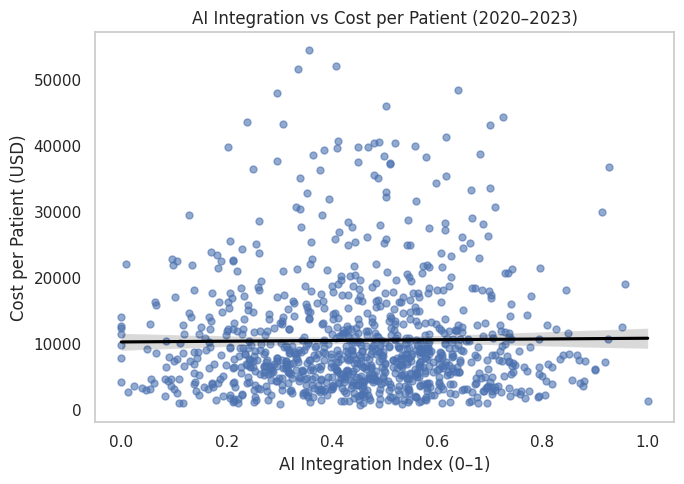

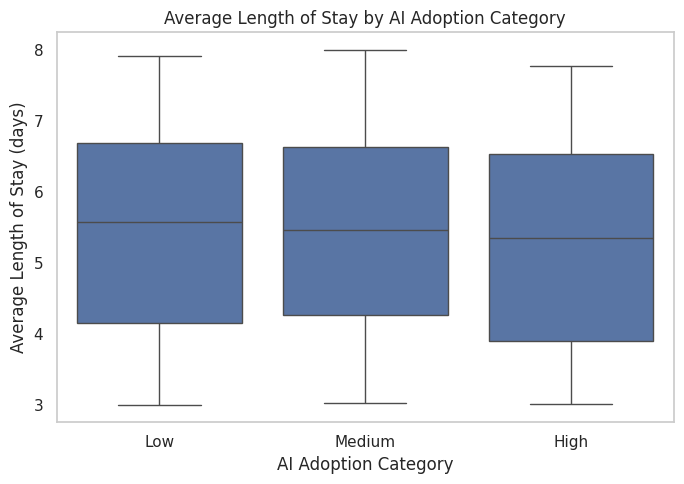

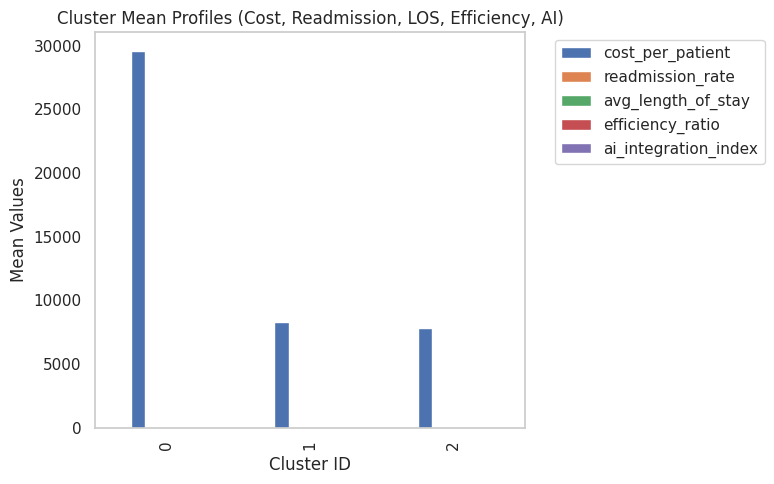

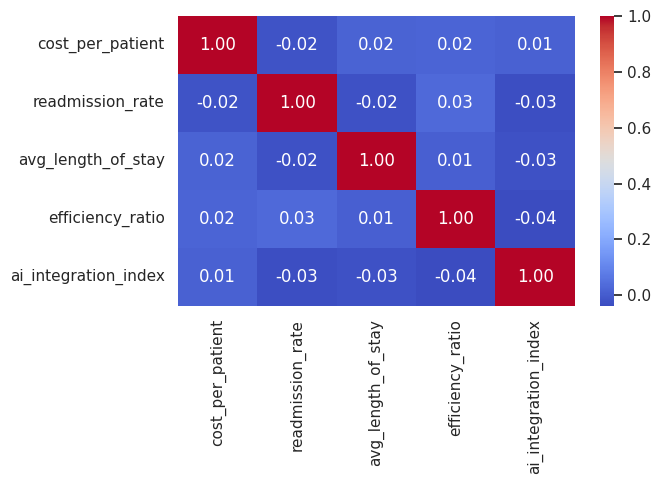

from matplotlib import pyplot as plt
cluster_summary['cost_per_patient'].plot(kind='hist', bins=20, title='cost_per_patient')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary['readmission_rate'].plot(kind='hist', bins=20, title='readmission_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary['avg_length_of_stay'].plot(kind='hist', bins=20, title='avg_length_of_stay')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary['efficiency_ratio'].plot(kind='hist', bins=20, title='efficiency_ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary.plot(kind='scatter', x='cost_per_patient', y='readmission_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary.plot(kind='scatter', x='readmission_rate', y='avg_length_of_stay', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary.plot(kind='scatter', x='avg_length_of_stay', y='efficiency_ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary.plot(kind='scatter', x='efficiency_ratio', y='ai_integration_index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary['cost_per_patient'].plot(kind='line', figsize=(8, 4), title='cost_per_patient')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary['readmission_rate'].plot(kind='line', figsize=(8, 4), title='readmission_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary['avg_length_of_stay'].plot(kind='line', figsize=(8, 4), title='avg_length_of_stay')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_summary['efficiency_ratio'].plot(kind='line', figsize=(8, 4), title='efficiency_ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats
import os

# Paths
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/hospital_operations_2020_2023.csv"
OUT_DIR = "/content/drive/MyDrive/Colab Notebooks/analysis_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

# Load data
df = pd.read_csv(DATA_PATH)

# Transform variables
df['log_cost_per_patient'] = np.log1p(df['cost_per_patient'])
df['ai_cat'] = pd.cut(df['ai_integration_index'], bins=[-0.01,0.33,0.66,1.0], labels=['Low','Medium','High'])

# ---------------------------------------------------------------------
# 1️⃣ Descriptive Statistics
# ---------------------------------------------------------------------
desc = df[['operational_costs','total_revenue','cost_per_patient','avg_length_of_stay',
           'readmission_rate','ai_integration_index','staff_productivity']].describe().T
desc = desc[['mean','std','min','50%','max']].rename(columns={'50%':'median'})
print("=== Descriptive Statistics ===")
display(desc)
desc.to_csv(os.path.join(OUT_DIR,"descriptive_statistics.csv"))

# ---------------------------------------------------------------------
# 2️⃣ Regression Analysis
# ---------------------------------------------------------------------
reg_df = df.dropna(subset=['log_cost_per_patient','ai_integration_index','discharges',
                           'avg_length_of_stay','efficiency_ratio'])
reg_df = pd.get_dummies(reg_df, columns=['hospital_type'], drop_first=True)

# Convert boolean columns to integers for statsmodels
for col in reg_df.columns:
    if reg_df[col].dtype == 'bool':
        reg_df[col] = reg_df[col].astype(int)

X_cols = ['ai_integration_index','discharges','avg_length_of_stay','efficiency_ratio'] + \
         [c for c in reg_df.columns if c.startswith('hospital_type_')]
X = sm.add_constant(reg_df[X_cols])
y = reg_df['log_cost_per_patient']
model = sm.OLS(y, X).fit(cov_type='HC3')

print("\n=== Regression Summary (Excerpt) ===")
print(model.summary().tables[1])  # coefficient table
with open(os.path.join(OUT_DIR,"regression_summary.txt"), "w") as f:
    f.write(model.summary().as_text())

# ---------------------------------------------------------------------
# 3️⃣ Mediation (Sobel Test)
# ---------------------------------------------------------------------
med_df = reg_df.dropna(subset=['staff_productivity'])
m_X = sm.add_constant(med_df[['ai_integration_index','discharges','avg_length_of_stay','efficiency_ratio'] +
                              [c for c in med_df.columns if c.startswith('hospital_type_')]])
m_y = med_df['staff_productivity']
med_model = sm.OLS(m_y, m_X).fit(cov_type='HC3')

out_X = sm.add_constant(med_df[['ai_integration_index','staff_productivity','discharges',
                                'avg_length_of_stay','efficiency_ratio'] +
                               [c for c in med_df.columns if c.startswith('hospital_type_')]])
out_y = med_df['log_cost_per_patient']
out_model = sm.OLS(out_y, out_X).fit(cov_type='HC3')

a = med_model.params['ai_integration_index']
b = out_model.params['staff_productivity']
sa = med_model.bse['ai_integration_index']
sb = out_model.bse['staff_productivity']
den = np.sqrt(b**2 * sa**2 + a**2 * sb**2)
z_sobel = (a * b) / den if den != 0 else np.nan
p_sobel = 2 * (1 - stats.norm.cdf(abs(z_sobel)))

print("\n=== Mediation (Sobel Test) ===")
print(f"a = {a:.4f}, b = {b:.4f}, z = {z_sobel:.4f}, p = {p_sobel:.4f}")

# ---------------------------------------------------------------------
# 4️⃣ Cluster Analysis
# ---------------------------------------------------------------------
cluster_feats = df[['cost_per_patient','readmission_rate','avg_length_of_stay','efficiency_ratio']].fillna(df[['cost_per_patient','readmission_rate','avg_length_of_stay','efficiency_ratio']].mean())
scaler = StandardScaler()
Xc = scaler.fit_transform(cluster_feats)
kmeans = KMeans(n_clusters=3, random_state=42).fit(Xc)
df['cluster'] = kmeans.labels_

cluster_summary = df.groupby('cluster')[['cost_per_patient','readmission_rate',
                                         'avg_length_of_stay','efficiency_ratio','ai_integration_index']].mean().round(3)
print("\n=== Cluster Summary ===")
display(cluster_summary)

cluster_summary.to_csv(os.path.join(OUT_DIR,"cluster_summary.csv"))

# ---------------------------------------------------------------------
# 5️⃣ Figures (Displayed + Saved)
# ---------------------------------------------------------------------
sns.set(style="whitegrid")

# Figure 1: AI vs Cost per Patient
plt.figure(figsize=(7,5))
sns.regplot(x='ai_integration_index', y='cost_per_patient', data=df,
            scatter_kws={'s':25, 'alpha':0.6}, line_kws={'color':'black'})
plt.title("AI Integration vs Cost per Patient (2020–2023)")
plt.xlabel("AI Integration Index (0–1)")
plt.ylabel("Cost per Patient (USD)")
plt.grid (False)
plt.tight_layout()
plt.show()

# Figure 2: Average LOS by AI Category
plt.figure(figsize=(7,5))
sns.boxplot(x='ai_cat', y='avg_length_of_stay', data=df)
plt.title("Average Length of Stay by AI Adoption Category")
plt.xlabel("AI Adoption Category")
plt.ylabel("Average Length of Stay (days)")
plt.grid (False)
plt.tight_layout()
plt.show()

# Figure 3: Cluster Mean Profiles
cluster_summary.plot(kind='bar', figsize=(8,5))
plt.title("Cluster Mean Profiles (Cost, Readmission, LOS, Efficiency, AI)")
plt.ylabel("Mean Values")
plt.xlabel("Cluster ID")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid (False)
plt.tight_layout()
plt.show()

# Figure 4: Correlation Matrix
plt.figure(figsize=(7,5))
sns.heatmap(df[['cost_per_patient','readmission_rate','avg_length_of_stay',
                'efficiency_ratio','ai_integration_index']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("")
plt.grid (False)
plt.tight_layout()
plt.show()

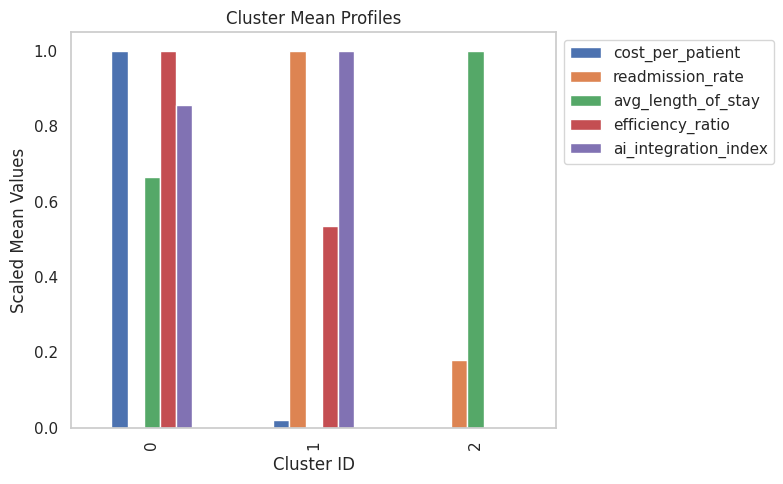

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaled_summary = cluster_summary.copy()
scaler = MinMaxScaler()
scaled_summary[:] = scaler.fit_transform(scaled_summary)

scaled_summary.plot(kind='bar', figsize=(8,5))
plt.title("Cluster Mean Profiles")
plt.ylabel("Scaled Mean Values")
plt.xlabel("Cluster ID")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid (False)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.mediation import Mediation
from statsmodels.formula.api import ols
import numpy as np


In [ ]:
model_a = ols("staff_productivity ~ ai_integration_index", data=df).fit()
print(model_a.summary())


                            OLS Regression Results                            
Dep. Variable:     staff_productivity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.005654
Date:                Wed, 22 Oct 2025   Prob (F-statistic):              0.940
Time:                        07:33:34   Log-Likelihood:                -3868.4
No. Observations:                1000   AIC:                             7741.
Df Residuals:                     998   BIC:                             7751.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               89.6811 

In [ ]:
model_b = ols("efficiency_ratio ~ ai_integration_index + staff_productivity", data=df).fit()
print(model_b.summary())


                            OLS Regression Results                            
Dep. Variable:       efficiency_ratio   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.040
Date:                Wed, 22 Oct 2025   Prob (F-statistic):              0.354
Time:                        07:53:11   Log-Likelihood:                 1417.2
No. Observations:                1000   AIC:                            -2828.
Df Residuals:                     997   BIC:                            -2814.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1415 

In [ ]:

model_c = ols("efficiency_ratio ~ ai_integration_index", data=df).fit()
print(model_c.summary())

                            OLS Regression Results                            
Dep. Variable:       efficiency_ratio   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.485
Date:                Wed, 22 Oct 2025   Prob (F-statistic):              0.223
Time:                        07:53:38   Log-Likelihood:                 1416.9
No. Observations:                1000   AIC:                            -2830.
Df Residuals:                     998   BIC:                            -2820.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1526 

In [ ]:
def bootstrap_indirect(df, x, m, y, n_boot=5000):
    a_model = ols(f"{m} ~ {x}", data=df).fit()
    b_model = ols(f"{y} ~ {x} + {m}", data=df).fit()

    a = a_model.params[x]
    b = b_model.params[m]
    indirect = []

    for _ in range(n_boot):
        sample = df.sample(len(df), replace=True)
        a_bs = ols(f"{m} ~ {x}", data=sample).fit().params[x]
        b_bs = ols(f"{y} ~ {x} + {m}", data=sample).fit().params[m]
        indirect.append(a_bs * b_bs)

    indirect = np.array(indirect)
    ci_lower, ci_upper = np.percentile(indirect, [2.5, 97.5])
    return a, b, np.mean(indirect), ci_lower, ci_upper

a, b, indirect, ci_low, ci_high = bootstrap_indirect(
    df, "ai_integration_index", "staff_productivity", "efficiency_ratio"
)
print(f"a = {a:.3f}, b = {b:.3f}, indirect = {indirect:.3f}, 95% CI = [{ci_low:.3f}, {ci_high:.3f}]")



a = 0.149, b = 0.000, indirect = 0.000, 95% CI = [-0.001, 0.001]


In [ ]:
a2, b2, indirect2, ci_low2, ci_high2 = bootstrap_indirect(
    df, "ai_integration_index", "staff_productivity", "efficiency_ratio"
)
print(f"Indirect2 = {indirect2:.3f}, 95% CI = [{ci_low2:.3f}, {ci_high2:.3f}]")

Indirect2 = 0.000, 95% CI = [-0.001, 0.001]


In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.7 MB/s eta 0:00:00


In [ ]:
import pingouin as pg

pg.mediation_analysis(
    data=df,
    x='ai_integration_index',
    m='staff_productivity',
    y='efficiency_ratio',
    alpha=0.05,
    n_boot=5000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,staff_productivity ~ X,0.148936,1.980685,0.940075,-3.737849,4.035722,No
1,Y ~ staff_productivity,0.000123,0.000160,0.442335,-0.000192,0.000438,No
2,Total,-0.012227,0.010034,0.223267,-0.031917,0.007462,No
3,Direct,-0.012246,0.010036,0.222666,-0.031939,0.007448,No
4,Indirect,0.000018,0.000405,0.955600,-0.000671,0.001080,No


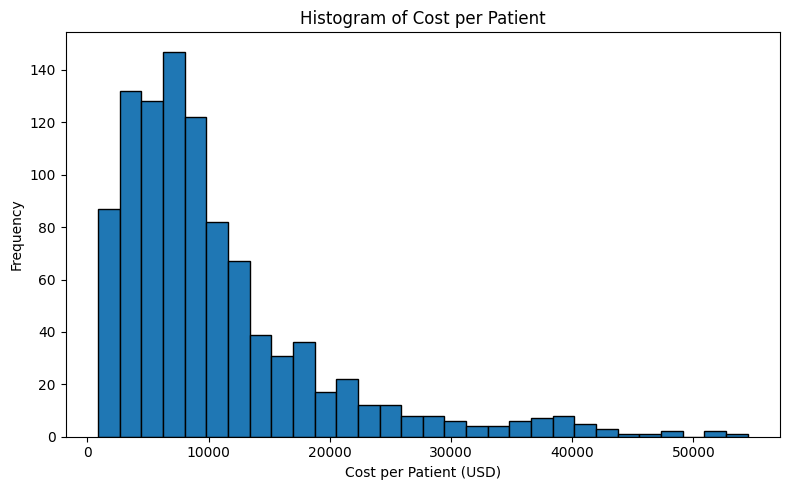

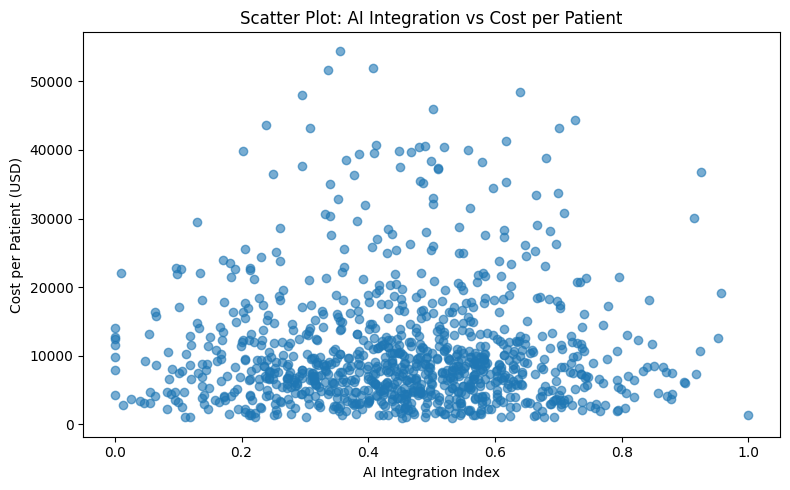

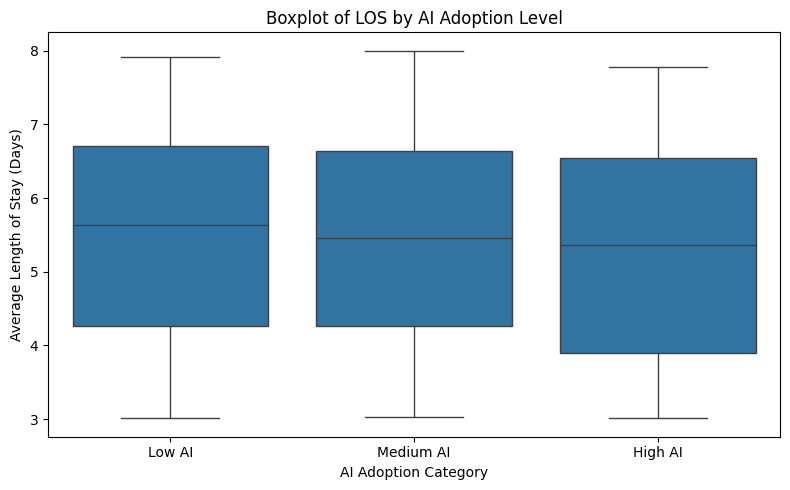

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hospital_operations_2020_2023.csv")

# ---------------------------------------------------
# 2. Histogram: Distribution of Cost per Patient
# ---------------------------------------------------
plt.figure(figsize=(8, 5))
plt.hist(data["cost_per_patient"], bins=30, edgecolor='black')
plt.xlabel("Cost per Patient (USD)")
plt.ylabel("Frequency")
plt.title("Histogram of Cost per Patient")
plt.tight_layout()
plt.savefig("hist_cost_per_patient.png", dpi=300)
plt.show()

# ---------------------------------------------------
# 3. Scatter Plot: AI Integration vs Cost per Patient
# ---------------------------------------------------
plt.figure(figsize=(8, 5))
plt.scatter(data["ai_integration_index"], data["cost_per_patient"], alpha=0.6)
plt.xlabel("AI Integration Index")
plt.ylabel("Cost per Patient (USD)")
plt.title("Scatter Plot: AI Integration vs Cost per Patient")
plt.tight_layout()
plt.savefig("scatter_ai_vs_cost.png", dpi=300)
plt.show()

# ---------------------------------------------------
# 4. Boxplot: Length of Stay Across AI Adoption Groups
# ---------------------------------------------------

# Convert AI Index into categories
data["AI_group"] = pd.cut(
    data["ai_integration_index"],
    bins=[0, 0.33, 0.66, 1.0],
    labels=["Low AI", "Medium AI", "High AI"]
)

plt.figure(figsize=(8, 5))
sns.boxplot(x="AI_group", y="avg_length_of_stay", data=data)
plt.xlabel("AI Adoption Category")
plt.ylabel("Average Length of Stay (Days)")
plt.title("Boxplot of LOS by AI Adoption Level")
plt.tight_layout()
plt.savefig("boxplot_los_ai_groups.png", dpi=300)
plt.show()


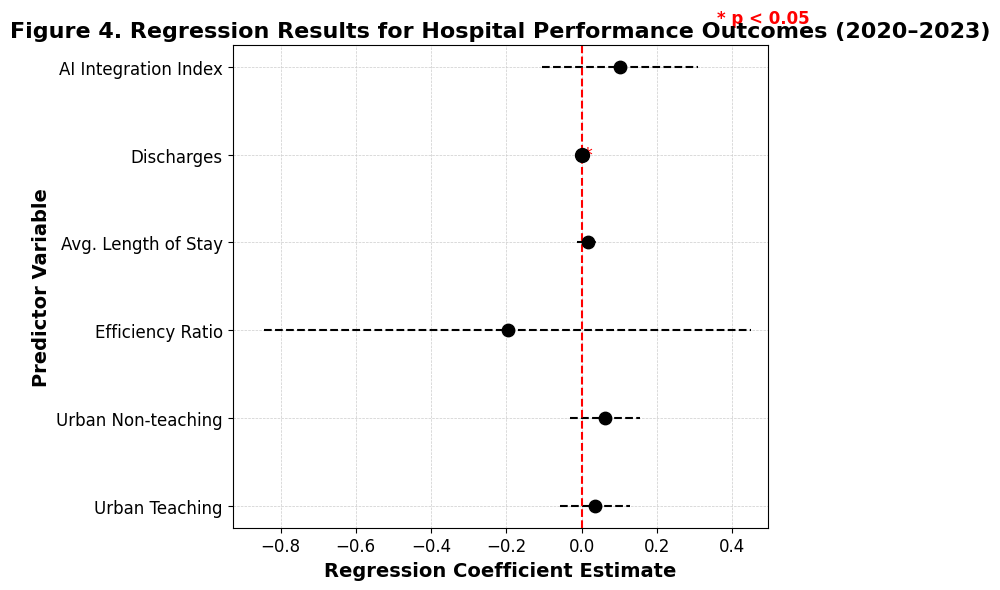

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data extracted from regression results
variable_names = ['AI Integration Index', 'Discharges', 'Avg. Length of Stay',
                  'Efficiency Ratio', 'Urban Non-teaching', 'Urban Teaching']

coeffs = np.array([0.1016, -3.293e-05, 0.0164, -0.1964, 0.0627, 0.0362])
std_errs = np.array([0.106, 1.34e-06, 0.014, 0.330, 0.047, 0.047])

# Calculate 95% Confidence Intervals
ci_lower = coeffs - 1.96 * std_errs
ci_upper = coeffs + 1.96 * std_errs

# Determine significance (p < 0.05) for asterisks
p_values = np.array([0.337, 0.000, 0.228, 0.551, 0.185, 0.442])
is_significant = p_values < 0.05

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot horizontal lines for confidence intervals
for i in range(len(coeffs)):
    y_pos = len(coeffs) - i  # Reverse order for better readability
    if is_significant[i]:
        ax.hlines(y_pos, ci_lower[i], ci_upper[i], color='black', linewidth=2)
        ax.scatter(coeffs[i], y_pos, color='black', s=100, zorder=5)  # Solid dot for significant
        ax.text(ci_upper[i] + 0.005 * max(abs(ci_upper)), y_pos, '*', fontsize=14, color='red', va='center')
    else:
        ax.hlines(y_pos, ci_lower[i], ci_upper[i], color='black', linestyle='--', linewidth=1.5)  # Dashed line
        ax.scatter(coeffs[i], y_pos, color='black', s=80, zorder=5)  # Filled circle

# Add vertical line at zero
ax.axvline(0, color='red', linestyle='--', linewidth=1.5)

# Set axis properties
ax.set_yticks(range(1, len(variable_names) + 1))
ax.set_yticklabels(variable_names[::-1])  # Reverse variable names for alignment
ax.set_xlim(min(ci_lower) * 1.1, max(ci_upper) * 1.1)
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel('Regression Coefficient Estimate', fontsize=14, fontweight='bold')
ax.set_ylabel('Predictor Variable', fontsize=14, fontweight='bold')
ax.set_title('Figure 4. Regression Results for Hospital Performance Outcomes (2020–2023)', fontsize=16, fontweight='bold')

# Add legend for significance
ax.text(max(ci_upper) * 0.8, len(coeffs) + 0.5, '* p < 0.05', fontsize=12, color='red', fontweight='bold')

# Improve layout
ax.grid(color=[0.8, 0.8, 0.8], linestyle='--', linewidth=0.5)
ax.set_facecolor('white')
fig.tight_layout()

# Save the figure for inclusion in your paper
plt.savefig('Figure4_RegressionResults.png', dpi=300, bbox_inches='tight')
plt.show()

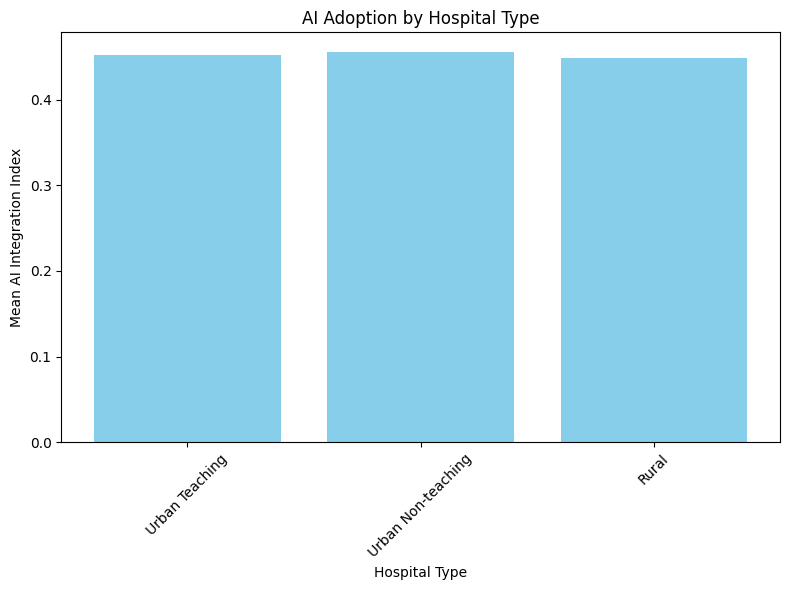

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hospital_operations_2020_2023.csv')

# Define hospital types
hospital_types = ['Urban Teaching', 'Urban Non-teaching', 'Rural']

# Calculate mean AI adoption for each hospital type
ai_adoption_means = [data[data['hospital_type'] == hospital_type]['ai_integration_index'].mean()
                     for hospital_type in hospital_types]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(hospital_types, ai_adoption_means, color='skyblue')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.xlabel('Hospital Type')
plt.ylabel('Mean AI Integration Index')
plt.title('AI Adoption by Hospital Type')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()